##### Load Require Libraries

<hr>
<br>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer

seed = 123

<br><br>

##### Generate data

<hr>
<br>

In [2]:
nsize = 10
sd1 = 1.5 
sd2 = 2.3 
corr = 0.3 
covv = corr * sd1 * sd2 

dat = pd.DataFrame(stats.multivariate_normal.rvs(size = nsize,
        mean = [2, 2], cov = [[sd1**2, covv], [covv, sd2**2]], random_state = seed),
                   columns = ['x', 'y'])



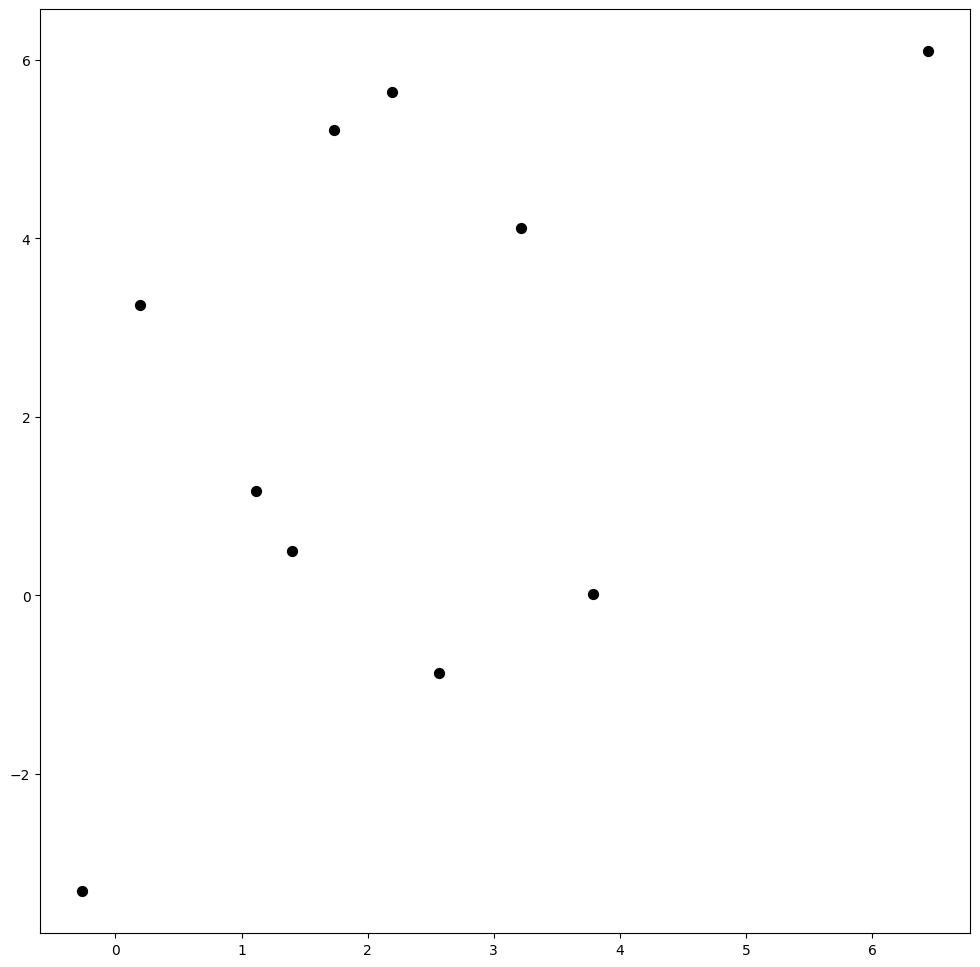

In [3]:
x = dat['x'].values
y = dat['y'].values

fig, ax = plt.subplots(1, 1, figsize = (12, 12))
ax.scatter(x, y, color = 'black', s = 50)
plt.show()

<br>

## split data into train and test

<hr> 
<br>

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, 
                                                random_state = seed)

<br><br>

## implement Linear Regression 

<hr> <br>

In [5]:
xx = xtrain[:, np.newaxis]
yy = ytrain[:, np.newaxis]
xx2 = xtest[:, np.newaxis]
yy2 = ytest[:, np.newaxis]
reg_fit = LinearRegression(fit_intercept = True)
Model1 = reg_fit.fit(xx, yy)
slope1 =  Model1.coef_[0]
Intercept1 = Model1.intercept_[0]

yhat_train_model1 = xtrain * slope1 * Intercept1
yhat_test_model1 = xtest * slope1 * Intercept1
MseTrain1 = mean_squared_error(ytrain, yhat_train_model1)
MseTest1 = mean_squared_error(ytest, yhat_test_model1)
print("""
      Mse Train Linear Model: {:.4f}, \n 
      Mse Test Linear Model: {:.4f}
      """.format(MseTrain1, MseTest1))


      Mse Train Linear Model: 11.9527, 
 
      Mse Test Linear Model: 8.8459
      


<br>

## implement Polynomial Regression 

<hr>
<br>

In [6]:
Poly1 = PolynomialFeatures(degree = 3)
Poly2 = PolynomialFeatures(degree = 7)
reg_fit2 = LinearRegression()
reg_fit3 = LinearRegression()

xtrain_trans1 = Poly1.fit_transform(xx)
xtrain_trans2 = Poly2.fit_transform(xx)

Model2 = reg_fit2.fit(xtrain_trans1, yy)
Model3 = reg_fit3.fit(xtrain_trans2, yy)


xtest_trans1 = Poly1.fit_transform(xx2)
xtest_trans2 = Poly2.fit_transform(xx2)



In [7]:
coef_model2 = Model2.coef_[0]
coef_model3 = Model3.coef_[0]
coef_model2[0] = Model2.intercept_[0]
coef_model3[0] = Model3.intercept_[0]

yhat_train_model2 = xtrain_trans1 @ coef_model2.T 
yhat_test_model2 = xtest_trans1 @ coef_model2 

yhat_train_model3 = xtrain_trans2 @ coef_model3.T 
yhat_test_model3 = xtest_trans2 @ coef_model3 

MseTrain2 = mean_squared_error(ytrain, yhat_train_model2)
MseTest2 = mean_squared_error(ytest, yhat_test_model2)
print("""
      Mse Train Polynomial Model with Degree 3: {:.4f}, \n 
      Mse Test Polynomial Model with Degree 3: {:.4f}
      """.format(MseTrain2, MseTest2))


MseTrain3 = mean_squared_error(ytrain, yhat_train_model3)
MseTest3 = mean_squared_error(ytest, yhat_test_model3)
print("""
      Mse Train Polynomial Model With Degree 7: {:.4f}, \n 
      Mse Test Polynomial Model With Degree 7 : {:.4f}
      """.format(MseTrain3, MseTest3))


      Mse Train Polynomial Model with Degree 3: 4.0598, 
 
      Mse Test Polynomial Model with Degree 3: 8.4410
      

      Mse Train Polynomial Model With Degree 7: 0.0000, 
 
      Mse Test Polynomial Model With Degree 7 : 26.4303
      


<br>

### Implement Bspline Model 

<hr>
<br>

In [8]:
spline = SplineTransformer(degree = 3, n_knots = 5)
xtrain_spline = spline.fit_transform(xx)
xtest_spline = spline.fit_transform(xx2)

reg_fit4 = LinearRegression()
Model4 = reg_fit4.fit(xtrain_spline, yy)

yhat_train_model4 = Model4.predict(xtrain_spline)
yhat_test_model4 = Model4.predict(xtest_spline)
MseTrain4 = mean_squared_error(yhat_train_model4, yy)
MseTest4 = mean_squared_error(yhat_test_model4, ytest)

print("""
      Mse Train Bspline Model: {:.4f}, \n 
      Mse Test Bspline Model : {:.4f}
      """.format(MseTrain4, MseTest4))


      Mse Train Bspline Model: 0.0000, 
 
      Mse Test Bspline Model : 25.4706
      


<br>

### Visualize Models 

<hr>
<br>

In [9]:
text1_ax1 = "OLS Model: MSE = " + str(round(MseTrain1, 4))
text2_ax1 = "PolyNomial Model With Degree 3: MSE = " + str(round(MseTrain2, 4))
text3_ax1 = "PolyNomial Model With Degree 7: MSE = " + str(round(MseTrain3, 4))
text4_ax1 = "Bspline Model With Degree 3 and  Number of Knots = 5: MSE = " + str(round(MseTrain4, 4))

text1_ax2 = "OLS Model: MSE = " + str(round(MseTest1, 4))
text2_ax2 = "PolyNomial Model With Degree 3: MSE = " + str(round(MseTest2, 4))
text3_ax2 = "PolyNomial Model With Degree 7: MSE = " + str(round(MseTest3, 4))
text4_ax2 = "Bspline Model With Degree 3 and  Number of Knots = 5: MSE = " + str(round(MseTest4, 4))

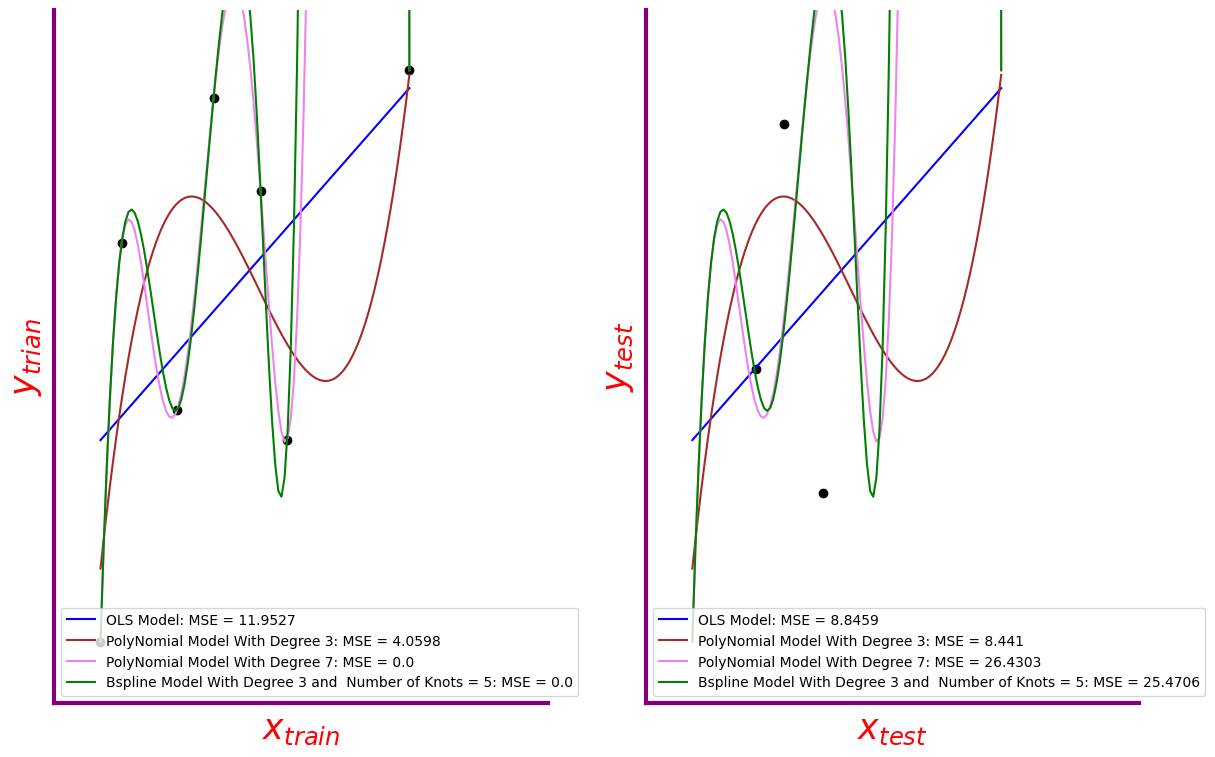

In [10]:
xmin = x.min()
xmax = x.max()

ymin = y.min()
ymax = y.max()

xtrainMin = xtrain.min()
xtrainMax = xtrain.max()
ytrainMin = ytrain.min()
ytrainMax = ytrain.max()

xtestMin = xtest.min()
xtestMax = xtest.max()
ytestMin = ytest.min()
ytestMax = ytest.max()

xspace1 = np.linspace(xmin, xmax, num = 100)
xspace2 = Poly1.fit_transform(xspace1[:, np.newaxis])
xspace3 = Poly2.fit_transform(xspace1[:, np.newaxis])
xspace_spline = spline.fit_transform(xspace1[:, np.newaxis])

yhat1 = slope1 * xspace1 + Intercept1
yhat1 = yhat1.reshape((100, 1))
yhat2 =  xspace2 @ coef_model2.T
yhat3 =  xspace3 @ coef_model3.T
yhat4 = Model4.predict(xspace_spline)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 9))

ax1.spines["left"].set_position(("axes", 0))
ax1.spines['left'].set_color('purple')
ax1.spines['bottom'].set_position(('data', 0))

ax1.spines['left'].set_color('purple')
ax1.spines['bottom'].set_position(('axes', 0))
ax1.spines['left'].set_linewidth(3)
ax1.spines['bottom'].set_linewidth(3)
ax1.spines['bottom'].set_color('purple')

ax2.spines["left"].set_position(("axes", 0))
ax2.spines['left'].set_color('purple')
ax2.spines['bottom'].set_position(('axes', 0))

ax2.spines['left'].set_color('purple')
ax2.spines['bottom'].set_position(('axes', 0))
ax2.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3)
ax2.spines['bottom'].set_color('purple')


for i in ['top', 'right']:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)



ax1.set_xlabel('$x_{train}$', {"color": 'red', "size": 25})
ax2.set_xlabel('$x_{test}$', {"color": 'red', "size": 25})

ax1.set_ylabel('$y_{trian}$', {'color': 'red', "size": 25})
ax2.set_ylabel('$y_{test}$', {'color': 'red', "size": 25})


ax1.scatter(xx, yy, color = 'black')
ax1.plot(xspace1, yhat1, c = 'blue', label = text1_ax1)
ax1.plot(xspace1, yhat2, c = "brown", label = text2_ax1)
ax1.plot(xspace1, yhat3, c = "violet", label = text3_ax1)
ax1.plot(xspace1, yhat4, c = "green", label = text4_ax1)

ax2.scatter(xx2, yy2, color = 'black')
ax2.plot(xspace1, yhat1, c = "blue", label = text1_ax2)
ax2.plot(xspace1, yhat2, c = "brown", label = text2_ax2)
ax2.plot(xspace1, yhat3, c = "violet", label = text3_ax2)
ax2.plot(xspace1, yhat4, c = "green", label = text4_ax2)


ax1.set_xlim((xmin - 1, xmax + 3))
ax1.set_ylim((ymin - 1, ymax + 1))




ax2.set_xlim((xmin - 1, xmax + 3))
ax2.set_ylim((ymin - 1, ymax + 1))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.legend()
ax2.legend()
plt.show()
